In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [103]:
data = pd.read_csv(r'C:\Users\Jayant\advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [104]:
data.shape

(200, 4)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [106]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [107]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [108]:
# Convert sales to categories
data['Sales_Category']=pd.cut(data['Sales'], bins=[0,10,20, np.inf], labels=['Low', 'Medium', 'High'])

In [109]:
# Drop the original Sales column
data=data.drop(columns=['Sales'])
data.head()

,TV,Radio,Newspaper,Sales_Category
0,230.1,37.8,69.2,High
1,44.5,39.3,45.1,Medium
2,17.2,45.9,69.3,Medium
3,151.5,41.3,58.5,Medium
4,180.8,10.8,58.4,Medium


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   TV              200 non-null    float64 
 1   Radio           200 non-null    float64 
 2   Newspaper       200 non-null    float64 
 3   Sales_Category  200 non-null    category
dtypes: category(1), float64(3)
memory usage: 5.1 KB


In [111]:
data.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


C:\Users\Jayant\AppData\Local\Temp\ipykernel_7816\2371685917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sales_Category', data=data, palette=['#5975A4', '#CC8963'])
C:\Users\Jayant\AppData\Local\Temp\ipykernel_7816\2371685917.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Sales_Category', data=data, palette=['#5975A4', '#CC8963'])


<Axes: xlabel='Sales_Category', ylabel='count'>

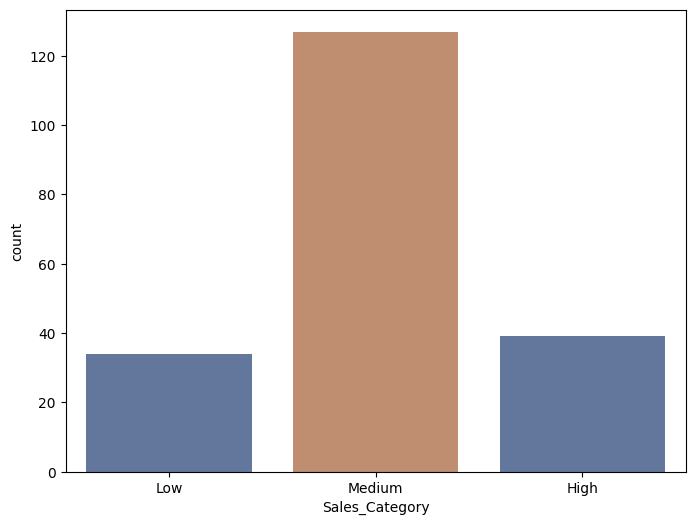

In [112]:
# Visualize the data
plt.figure(figsize=(8, 6))
sns.countplot(x='Sales_Category', data=data, palette=['#5975A4', '#CC8963'])

In [113]:
# Preprocess the data
X = data.drop(columns=['Sales_Category'])
Y = data['Sales_Category']

In [114]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [115]:
print(Y)

0        High
1      Medium
2      Medium
3      Medium
4      Medium
        ...  
195       Low
196    Medium
197    Medium
198      High
199    Medium
Name: Sales_Category, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=2)

In [117]:
#model traning using logistic regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [118]:
# Make predictions on training data
X_train_prediction = model.predict(X_train)

In [119]:
#Accuracy on training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.91875


In [121]:
# precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction, average='weighted')
print('Precision on Training data : ', training_data_precision)


Precision on Training data :  0.9183810483870968


In [122]:
# Make predictions on test data
X_test_prediction = model.predict(X_test)

In [123]:
#accuracy on test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.85


In [124]:
#precision on test data
test_data_precision = precision_score(X_test_prediction, Y_test, average='weighted')
print('Precision score on Test Data : ', test_data_precision)

Precision score on Test Data :  0.8821428571428571


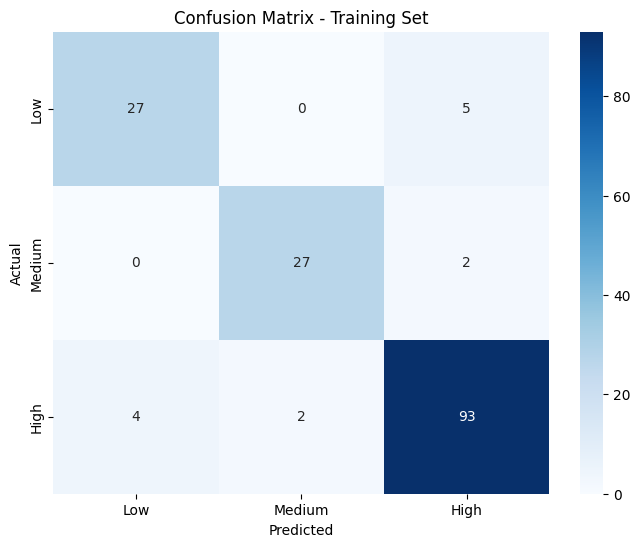

In [131]:
# Confusion matrix for training set
conf_matrix = confusion_matrix(Y_train, X_train_prediction )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

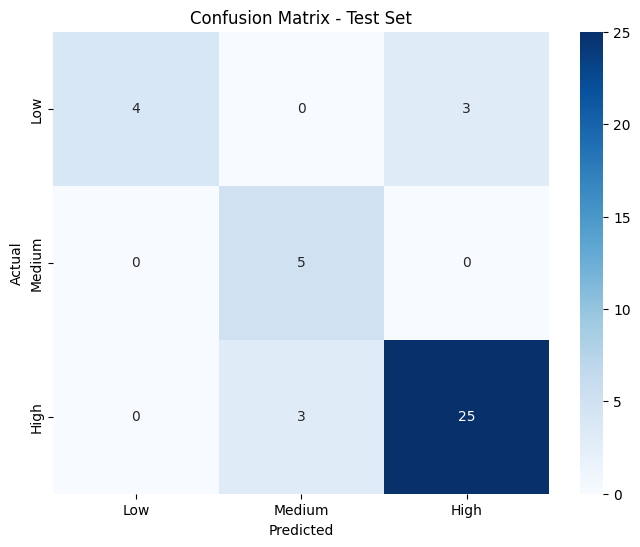

In [133]:
# Confusion matrix for test set
conf_matrix = confusion_matrix(Y_test, X_test_prediction )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()